# Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Checked version of matplotlib
import matplotlib
# Check matplotlib version
print(matplotlib.__version__)

3.7.0


In [3]:
#Imported path
path = r'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [4]:
path

'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [5]:
#Imported clean Adidas data set
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'df_adidas_US_clean.csv'), index_col = False)

In [28]:
#Checked head
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store,2020,1
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store,2020,1
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store,2020,1


# Exploring Relationships

In [29]:
#Deleted unnecessary columns
df = df.drop(columns=['Year'])
df = df.drop(columns=['Month'])

In [31]:
df.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin',
       'Sales Method'],
      dtype='object')

In [34]:
#Created correlation matrix
df.corr()

/var/folders/s6/6w6r95k55jz6km3wdfhch3_r0000gn/T/ipykernel_83445/2585459535.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Price per Unit,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,0.394546,0.892379,0.956307,1.000000,-0.211921
Operating Margin,-0.137486,-0.305479,-0.364592,-0.211921,1.000000


In [35]:
correlation_matrix = df.corr()

/var/folders/s6/6w6r95k55jz6km3wdfhch3_r0000gn/T/ipykernel_83445/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


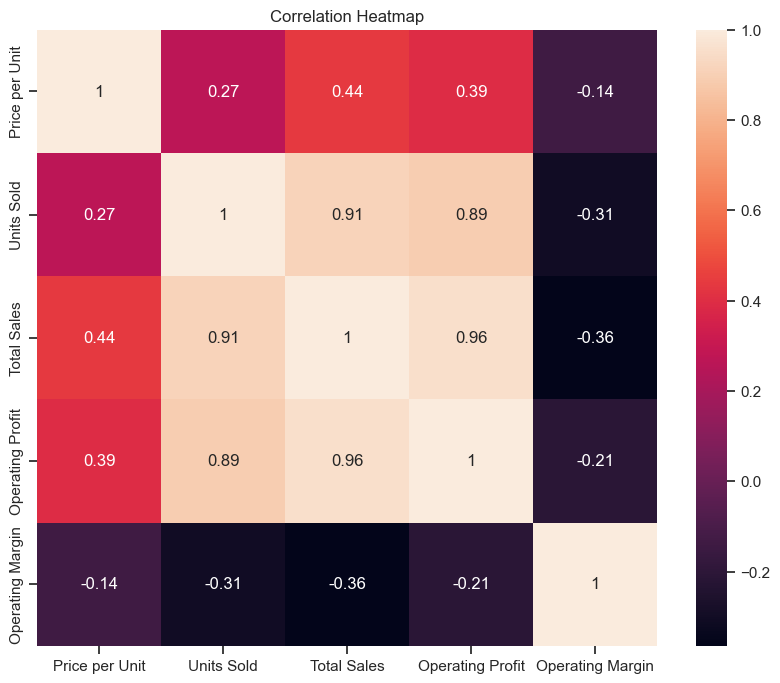

In [57]:
#Created heatmap
plt.figure(figsize=(10, 8))
corr = sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Displayed in the correlation table there is a range of values varying from negative to positive.

Units sold and operating profit show a positive correlation at 0.89. It shows that as units sold increases, the operating profits increase. More sales volume leads to higher profit generation.

Units sold and total sales show a positive correlation and a strong relationship at 0.91. It shows as more units sell, the total sales increase as well. 

Similarity total sales and operating profit also show a positive correlation and a strong relationship at 0.96. As the total sales increases, their are higher operating profits meaning sales has a strong influence on the profitability of Adidas. 

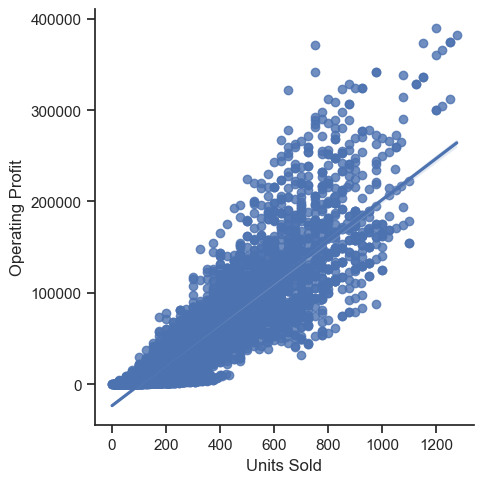

In [59]:
#Created scatterplot for units sold and operating profit
scatter_us_op = sns.lmplot(data=df, x="Units Sold", y="Operating Profit")

The scatterplot shows an upward trend and a lot of the data points scattered close to the line. This relationship highlights the importance of sales volume for generating profits.

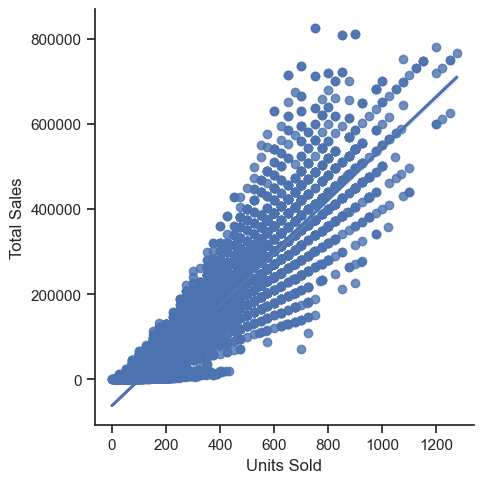

In [61]:
#Created scatterplot for units sold and total sales
scatter_us_ts = sns.lmplot(data=df, x="Units Sold", y="Total Sales")

The scatterplot shows an upward trend and a lot of the data points scattered close to the line. This highlights the volume of products sold has a significant impact on the total sales revenue.

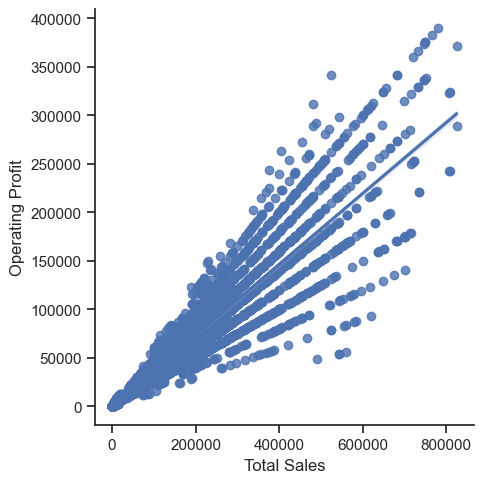

In [63]:
#Created scatterplot for total sales operating profit 
scatter_ts_op = sns.lmplot(data=df, x="Total Sales", y="Operating Profit") 

The scatterplot also shows an upward trend and a lot of the data points scattered close to the line. It can be seen that as the total sales increases, the operating profit also increases - highlighting the strong relationship of sales volume for generating profits.

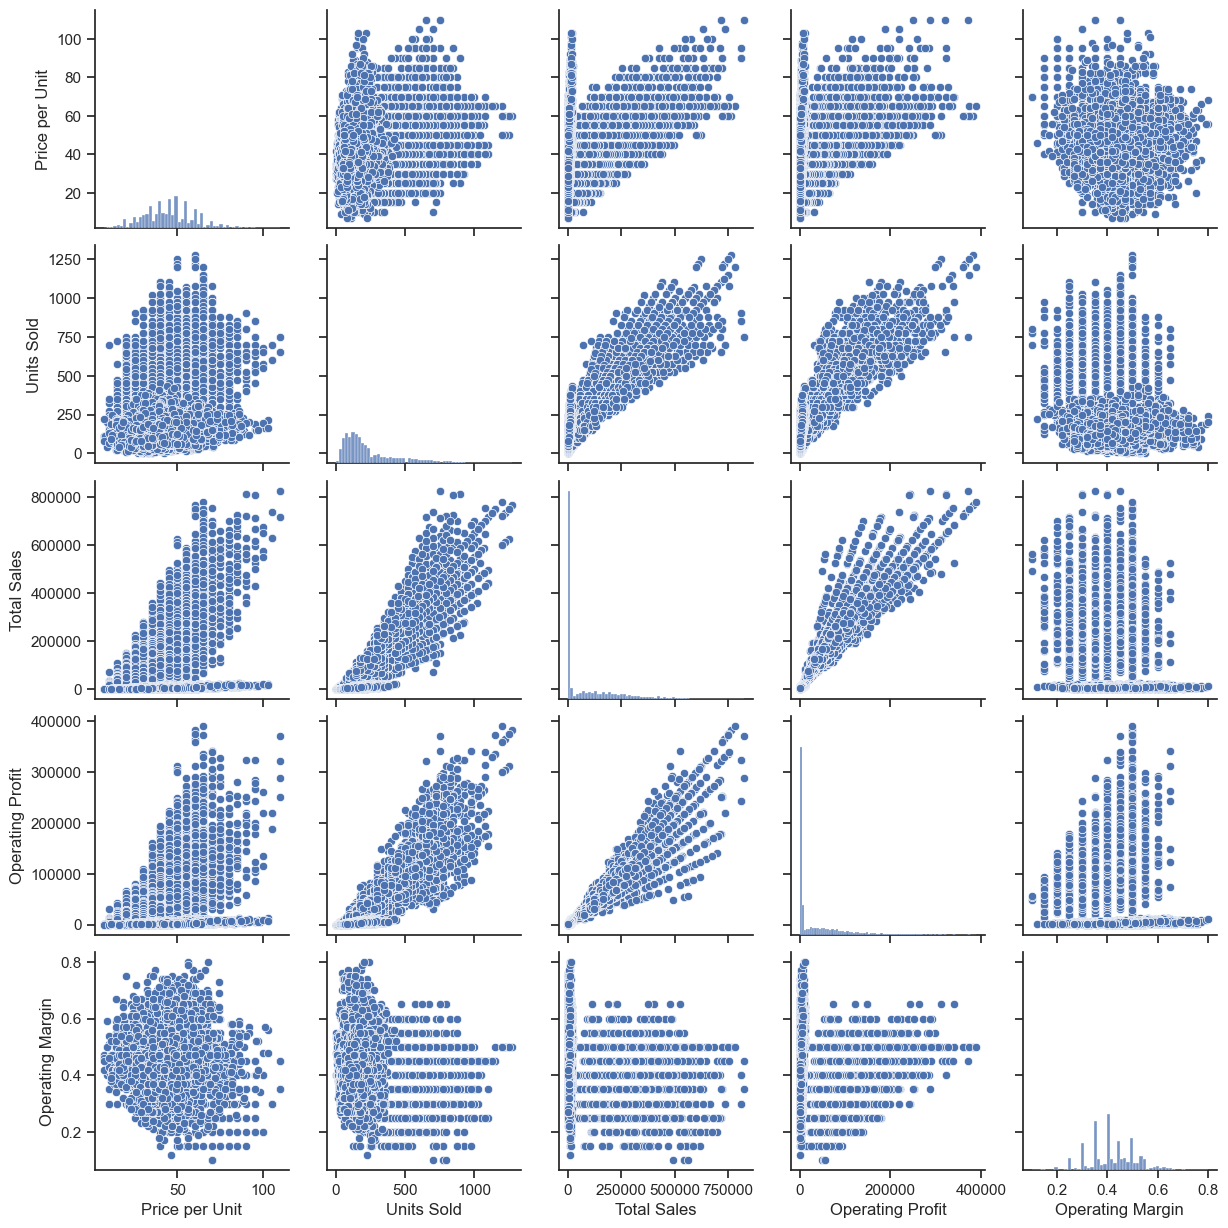

In [65]:
#Created a pair pot of entire dataset
pair = sns.pairplot(df)

Based on the pair plot variables to further explore include the operating profits, total sales, units sold, and price per unit. 

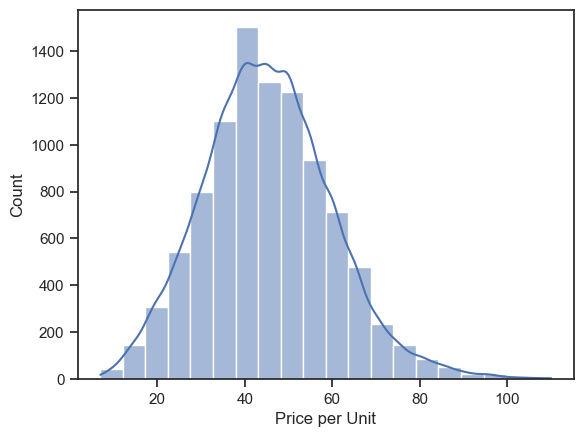

In [67]:
#Created a histogram
hist_price = sns.histplot(df['Price per Unit'], bins = 20, kde = True)

## Price per Unit Categories:
Low price < 30
Medium price >= 30 and <60
High price >= 60

In [48]:
df.loc[df['Price per Unit'] < 30, 'Price Category'] = 'Low price'

In [54]:
df.loc[(df['Price per Unit'] >= 30) & (df['Price per Unit'] < 60), 'Price Category'] = 'Medium price'

In [50]:
df.loc[df['Price per Unit'] >= 60, 'Price Category'] = 'High price'

In [51]:
#Checked the column

df['Price Category'].value_counts(dropna = False)

NaN           6672
High price    1661
Low price     1315
Name: Price Category, dtype: int64

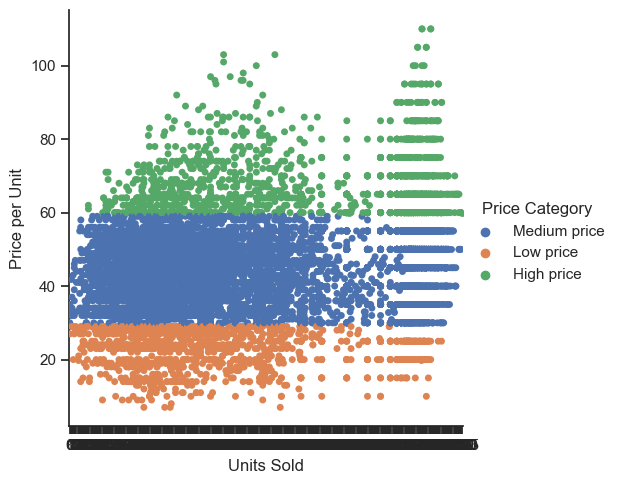

In [71]:
sns.set(style="ticks")
catplot = sns.catplot(x="Units Sold", y="Price per Unit", hue="Price Category", data=df)

Based on the analysis conducted on the quantitative variables it can be seen that total sales has a strong relationship with operating profit, price per unit, and units sold.

# Saving Visualizations

In [58]:
corr.figure.savefig(os.path.join(path, 'Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [60]:
scatter_us_op.figure.savefig(os.path.join(path, 'Visualizations','scatter_us_op.png'), bbox_inches='tight')

In [62]:
scatter_us_ts.figure.savefig(os.path.join(path, 'Visualizations','scatter_us_ts.png'), bbox_inches='tight')

In [64]:
scatter_ts_op.figure.savefig(os.path.join(path, 'Visualizations','scatter_ts_op.png'), bbox_inches='tight')

In [66]:
pair.figure.savefig(os.path.join(path, 'Visualizations','pair_plot.png'), bbox_inches='tight')

In [70]:
hist_price.figure.savefig(os.path.join(path, 'Visualizations','histogram_price_per_unit.png'), bbox_inches='tight')

In [72]:
catplot.figure.savefig(os.path.join(path, 'Visualizations','catplot.png'), bbox_inches='tight')